In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Format for data files (`%d` will be replaced with file number):

In [84]:
file = '/Users/berkeleyalmand/Dropbox/cham_1_random_forest/reference_data/big_tower_2b_coll_v%d.csv'

Load all `.csv` files (strip whitespace from column names):

In [86]:
# ##import pod data
# file = '/Users/berkeleyalmand/Dropbox/cham_1_random_forest/K1071814.txt'
# ##read the table of pod data into a quantity, called "df_K" and rename the ∂TempIN column
# df_K = pd.read_table(file, sep='\s+', parse_dates=[[1, 2]], index_col=0)
# df_K = df_K.rename(columns={'∂TempIN': 'deltaTempIN'})

In [4]:
df_K = pd.DataFrame.from_csv('data/cham3_coll_feat.csv', parse_dates = 0, index_col=0)

In [7]:
df_K.head()

,e2v03,no2,Temp,Rh,ln_O3,ln_temp,ln_rh,e2v03_int_lag_1,e2v03_int_lag_3,e2v03_int_lag_5,...,Temp_sq,Temp_interact_ln_temp,Temp_interact_Rh,Temp_interact_ln_rh,ln_temp_sq,ln_temp_interact_Rh,ln_temp_interact_ln_rh,Rh_sq,Rh_interact_ln_rh,ln_rh_sq
date,,,,,,,,,,,,,,,,,,,,,
2014-07-17 17:56:40,608,871,36.2,23.4,6.410175,3.589059,3.152736,0,1218.0,2434.5,...,1310.44,129.923940,847.08,114.129044,12.881345,83.983983,11.315356,547.56,73.774023,9.939744
2014-07-17 17:56:45,609,870,36.2,23.3,6.411818,3.589059,3.148453,0,1217.5,2435.0,...,1310.44,129.923940,843.46,113.974012,12.881345,83.625077,11.299985,542.89,73.358963,9.912759
2014-07-17 17:56:50,609,870,36.2,23.3,6.411818,3.589059,3.148453,0,1217.0,2435.0,...,1310.44,129.923940,843.46,113.974012,12.881345,83.625077,11.299985,542.89,73.358963,9.912759
2014-07-17 17:56:55,608,869,36.3,23.3,6.410175,3.591818,3.148453,0,1217.5,2435.0,...,1317.69,130.382984,845.79,114.288857,12.901155,83.689353,11.308671,542.89,73.358963,9.912759
2014-07-17 17:57:00,609,868,36.2,23.2,6.411818,3.589059,3.144152,0,1217.5,2434.5,...,1310.44,129.923940,839.84,113.818312,12.881345,83.266172,11.284548,538.24,72.944333,9.885694


First pass data cleaning: drop all rows where `deltaTempIN` is not positive

In [5]:
# df_K = df_K[df_K.deltaTempIN > 0]

In [6]:
##resample the reference data to be on the minute
df0_resampled = pd.DataFrame({'O3_ppb': df[0]['O3_ppb'].resample('1Min')})

NameError: name 'df' is not defined

##Resample to one-minute intervals

(Interpolate reference data to get points exactly each minute)

First, resample existing series:
1. 9 reference O3 series
2. Cheap-sensor O3 series
3. Cheap-sensor temp. series
4. Cheap-sensor RH series

In [94]:
# make names for the columns in a new table to put reference and pod data into 
ser_resamp = []
ser_names = []

# Resample the reference series:
for n_ref in range(0):
    ser_names.append('O3_ppb_ref%d' % (n_ref+1,))
    ser_resamp.append(df[n_ref]['O3_ppb'].resample('3Min'))

# Resample the cheap-sensor series:    
ser_names.append('O3_mV')
ser_resamp.append(df_K['o3'].resample('1Min'))
ser_names.append('Temp_mV')
ser_resamp.append(df_K['deltaTempIN'].resample('2Min'))
ser_names.append('RH_mV')
ser_resamp.append(df_K['RhIN'].resample('2Min'))
ser_names.append('unixtime')
ser_resamp.append(df_K['UnixTime'].resample('2Min'))

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex

In [99]:
print df_K['o3']

YYYY/MM/DD_HH:MM:SS
2014/7/18 17:18:41     529
2014/7/18 17:18:46     530
2014/7/18 17:18:51     529
2014/7/18 17:18:56     531
2014/7/18 17:19:0      531
2014/7/18 17:19:5      531
2014/7/18 17:19:10     531
2014/7/18 17:19:15     531
2014/7/18 17:19:20     531
2014/7/18 17:19:24     531
2014/7/18 17:19:29     531
2014/7/18 17:19:34     532
2014/7/18 17:19:39     532
2014/7/18 17:19:43     532
2014/7/18 17:19:48     533
...
2014/7/25 10:5:25      536
2014/7/25 10:5:30      536
2014/7/25 10:5:34      536
2014/7/25 10:5:39      536
2014/7/25 10:5:44      536
2014/7/25 10:5:49      536
2014/7/25 10:5:54      536
2014/7/25 10:5:59      536
2014/7/25 10:6:3       536
2014/7/25 10:6:8       536
2014/7/25 10:6:13      537
2014/7/25 10:6:18      537
2014/7/25 10:6:22      537
2014/7/25 10:6:27      537
2014/7/25 10:6:32      537
Name: o3, Length: 114966, dtype: float64


Now create a new dataframe from the resampled series:

In [93]:
df_resamp = pd.DataFrame(data=dict(zip(ser_names, ser_resamp)))

###Look at relationship with just first reference

##Edit Reference Data Version Below

In [162]:
df_ref5 = df_resamp[['O3_ppb_ref3', 'O3_mV', 'Temp_mV', 'RH_mV','unixtime']].dropna()

In [163]:
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11f02d450>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10e13dc10>], dtype=object)

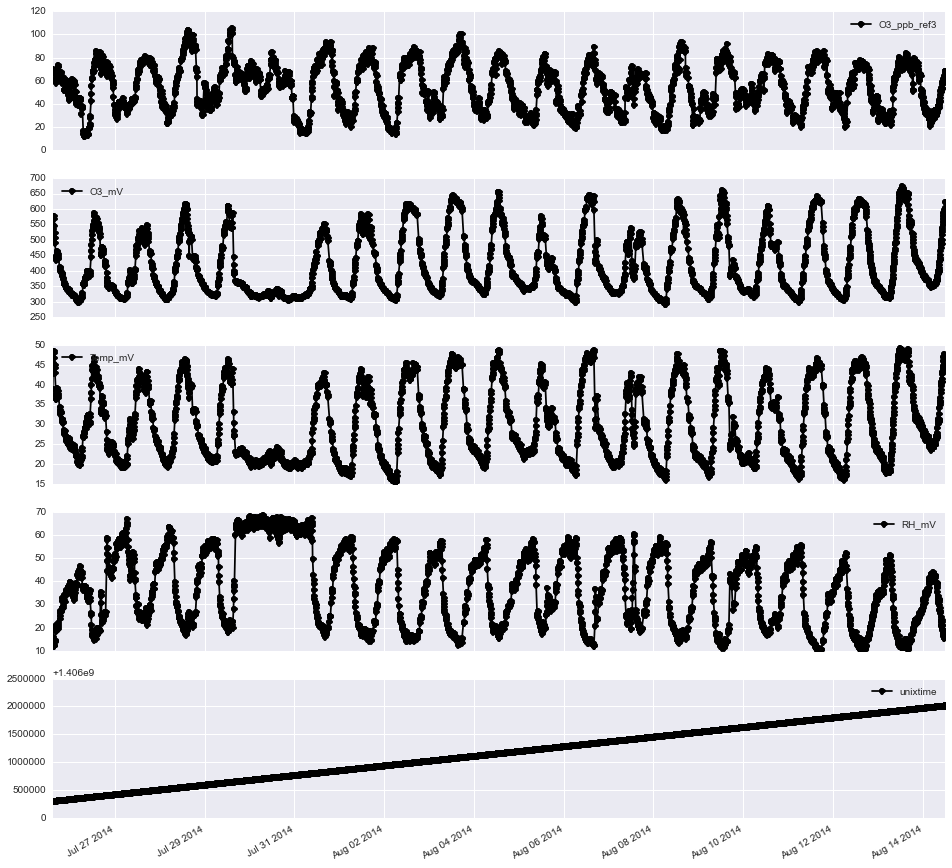

In [164]:
df_ref5.plot(subplots=True, figsize=(16,16), marker='o')

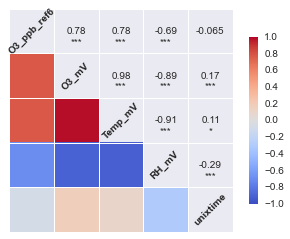

In [96]:
sns.corrplot(df_ref5)

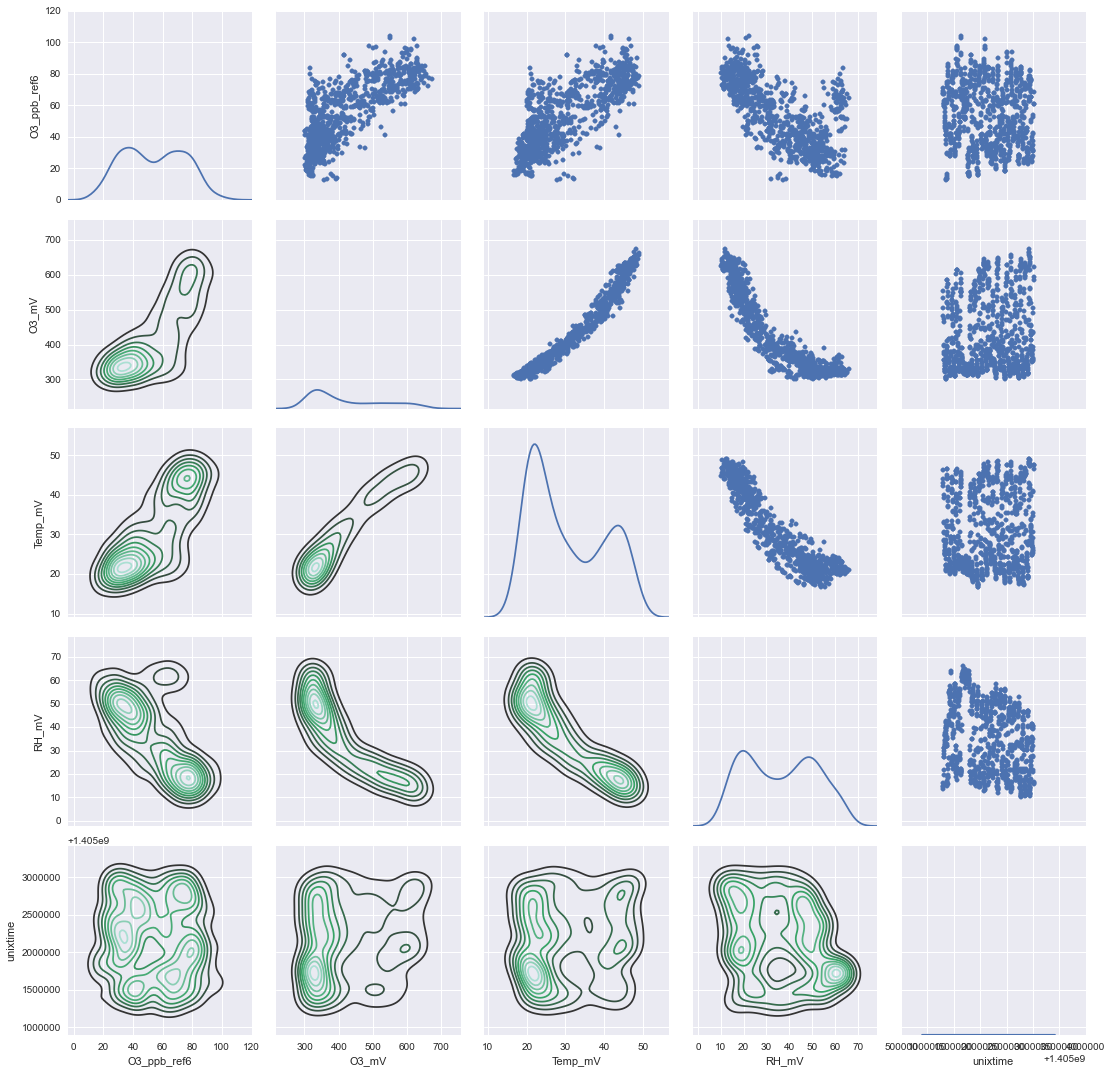

In [97]:
g = sns.PairGrid(df_ref5)
g.map_diag(sns.kdeplot, legend=False)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

##Fit with sklearn.RandomForestRegressor

In [151]:
import sklearn.ensemble as sk
rfr = sk.RandomForestRegressor(n_estimators=1000, oob_score = True)

##Edit Reference Data Version Below

In [165]:
X = df_ref5[['O3_mV', 'Temp_mV', 'RH_mV','unixtime']].as_matrix()
y = df_ref5['O3_ppb_ref3'].as_matrix()

In [166]:
rfr.fit(X, y) #X is training, Y is target/reference

RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
           min_samples_split=2, n_estimators=1000, n_jobs=1,
           oob_score=True, random_state=None, verbose=0)

In [167]:
rfr.oob_score_

0.95655059722025193

In [168]:
rfr.score(X,y)

0.99410167535387972

In [36]:
#shuffle the data in time to avoid training on two sequences that are right next to each other
new_index = X.index.copy()
new_index.shuffle(inplace=True)
X.reindex(new_index, inplace=True)
y.reindex(new_index, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'index'

##Test on the whole reference set (`df_ref1`)

##Edit Reference Data Version Below

In [169]:
df_ref1 = df_resamp[['O3_ppb_ref6', 'O3_mV', 'Temp_mV', 'RH_mV','unixtime']].dropna()

In [170]:
#df_ref1.plot(subplots=True, figsize=(16,16))

In [171]:
X_total = df_ref1[['O3_mV', 'Temp_mV', 'RH_mV','unixtime']].as_matrix()

In [172]:
df_fit1 = pd.DataFrame(rfr.predict(X_total), index=df_ref1.index, columns=['O3_ppb_fit1'])

##Edit Reference Data Version Below

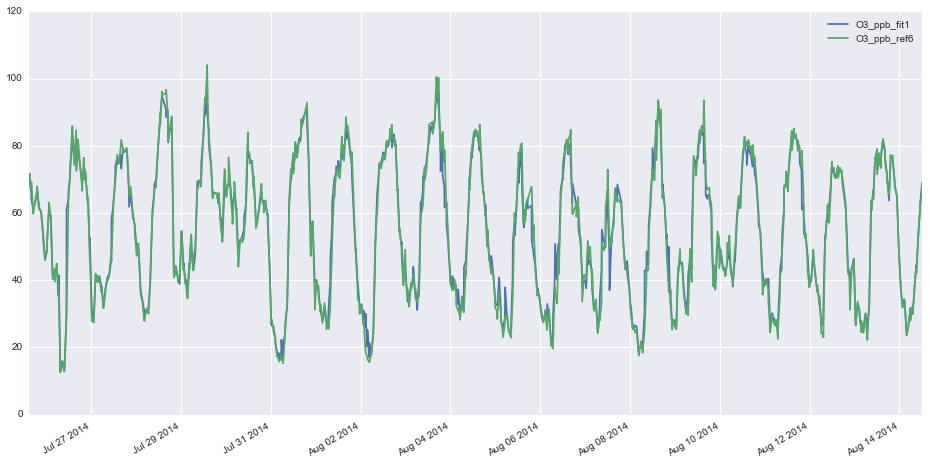

In [173]:
##show regression with data from the reference file used
df_fit1.plot()
ax = df_ref1['O3_ppb_ref6'].plot(figsize=(16,8),legend=True)
#xlim=['2014-08-01', '2014-08-02']

##Apply to Raw Data

In [174]:
X_raw = df_K[['o3', 'deltaTempIN', 'RhIN','UnixTime']].dropna().as_matrix()
df_fit_raw = pd.DataFrame(rfr.predict(X_raw), index=df_K.index, columns=['O3_ppb_fit_raw'])

In [175]:
%matplotlib inline

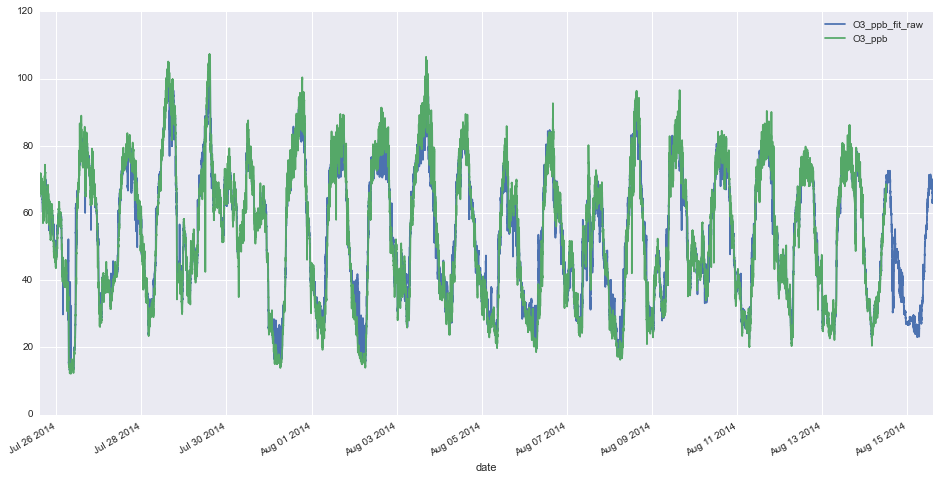

In [176]:
df_fit_raw.plot(figsize=(16,8))
df[0]['O3_ppb'].plot(legend=True)

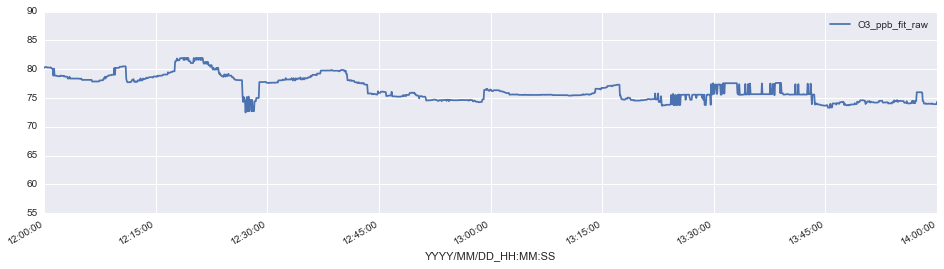

In [204]:
##visualize a small chunk of the calibrated data to see if the chamber closures are visible
df_fit_raw.plot(xlim=['2014-07-30 12:00:00', '2014-07-30 14:00:00'], ylim = [55,90], figsize=(16,4))

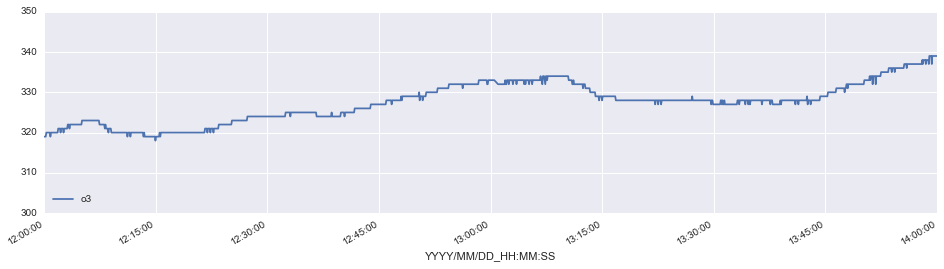

In [207]:
##visualize the ozone data to compare it with the calibrated chamber data
df_K['o3'].plot(xlim=['2014-07-30 12:00:00', '2014-07-30 14:00:00'], ylim = [300,350], figsize=(16,4), legend = 'True')

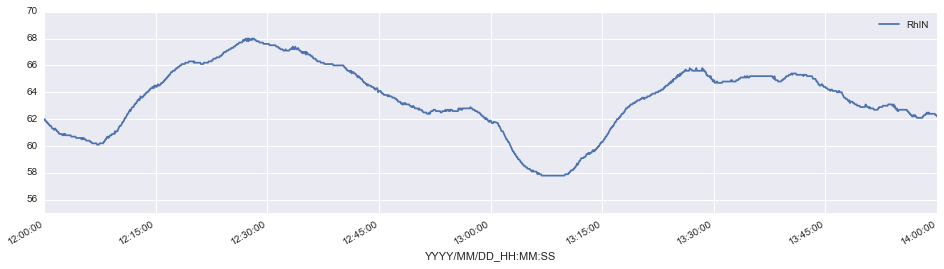

In [210]:
df_K['RhIN'].plot(xlim=['2014-07-30 12:00:00', '2014-07-30 14:00:00'], ylim = [55,70], figsize=(16,4), legend = 'True')

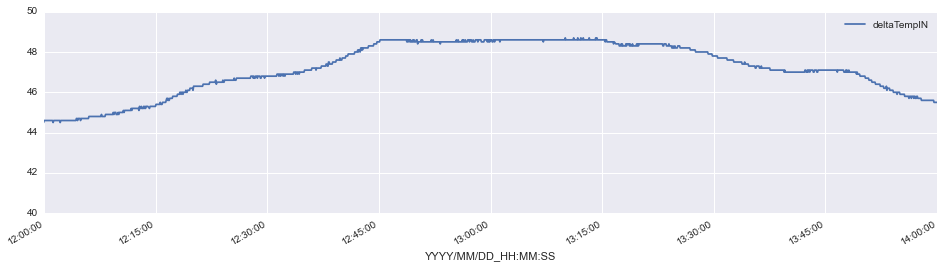

In [203]:
df_K['deltaTempIN'].plot(xlim=['2014-08-04 12:00:00', '2014-08-04 14:00:00'], ylim = [40,50],  figsize=(16,4), legend = 'True')

#http://www.kaggle.com/wiki/GettingStartedWithPythonForDataScience

cfr = RandomForestClassifier(n_estimators=1000)

#find the cross validation error
from sklearn import cross_validation
import numpy as np
import logloss

#Simple K-Fold cross validation. 5 folds.
cv = cross_validation.KFold(len(X))
print cv

#iterate through the training and test cross validation segments and
#run the classifier on each one, aggregating the results into a list
results = []
for traincv, testcv in cv:
    probas = cfr.fit(X[traincv], y[traincv]).predict_proba(X[testcv])
    results.append( logloss.llfun(y[testcv], [x[1] for x in probas]) )

#print out the mean of the cross-validated results
print "Results: " + str(np.array(results).mean())

In [2]:
#get cross-validation score (https://earlbellinger.wordpress.com/2013/12/14/random-forests/)

from sklearn.cross_validation import cross_val_score
#scores = cross_val_score(rfc, data, labels, cv=100)
#print("Accuracy: %0.2f (+/- %0.2f)"
#      % (scores.mean(), scores.std()*2))